# 1. Introduction to Kaggle

* `Kaggle is a site where people create algorithms and compete against machine learning practitioners around the world.` Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.

* In this mission and the ones that follow, we're going to learn how to compete in Kaggle competitions. In this introductory mission we'll learn how to:

  * Approach a Kaggle competition
  * Explore the competition data and learn about the competition topic
  * Prepare data for machine learning
  * Train a model
  * Measure the accuracy of your model
  * Prepare and make your first Kaggle submission.

* This course presumes you have an understanding of Python and the pandas library.

* Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which passengers survived the [sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).

* In this competition, we have a data set of different information about passengers onboard the Titanic, and `we want to see if we can use that information to predict whether those people survived or not.`

* Each Kaggle competition has **two key data files that you will work with - a training set and a testing set.**

* The **training set** contains data we can use to train our model. It has a number of **feature columns** which contain various descriptive data, as well as a **column of the target values** we are trying to predict: in this case, Survival.

* The **testing set** contains all of the same feature columns, but is **missing the target value column.** Additionally, the testing set usually has fewer observations (rows) than the training set.

## TODO:
* Use pandas.read_csv() to import train.csv and assign it to the variable train.
* Use DataFrame.shape to calculate the number of rows and columns in train, and assign the result to train_shape.

In [1]:
import pandas as pd 
train=pd.read_csv('train.csv')
train.shape

test=pd.read_csv('test.csv')

# 2. Exploring the Data

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* The type of machine learning we will be doing is called **classification,** because when we make predictions we are classifying each passenger as a survivor or not. More specifically, we are performing **binary classification,** which means that there are only two different states we are classifying.

* In any machine learning exercise, **thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge,** and it's one of the most important determinants for success in machine learning.

* **In this case, understanding the Titanic disaster and `specifically what variables might affect the outcome of survival is important`**

* Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.

* `This indicates that Age, Sex, and PClass may be good predictors of survival.` We'll start by exploring Sex and Pclass by visualizing the data.

* Because the Survived column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use DataFrame.pivot_table() to easily do this:

In [3]:
import matplotlib.pyplot as plt

sex_pivot=train.pivot_table(index='Sex',values='Survived')
sex_pivot.plot.bar()
plt.show()

<Figure size 640x480 with 1 Axes>

* We can immediately see that females survived in much higher proportions than males did.

## TODO:
* Use DataFrame.pivot_table() to pivot the train dataframe:
  * Use "Pclass" for the index parameter.
  * Use "Survived" for the values parameter.
* Use DataFrame.plot.bar() to plot the pivot table.

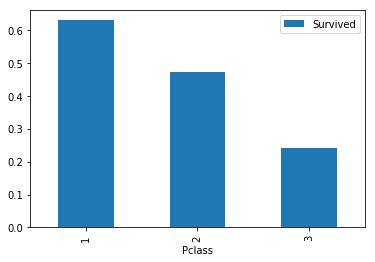

In [4]:
Pclass_pivot=train.pivot_table(index='Pclass',values='Survived')
Pclass_pivot.plot.bar()

* The Sex and PClass columns are what we call `categorical features.` 

# 3. Exploring and Converting the Age Column

In [5]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Observation:**
* The Age column contains numbers ranging from 0.42 to 80.0 (if you look at Kaggle's data page, it informs us that Age is fractional if the passenger is less than one). 
* The other thing to note here is that there are 714 values in this column, fewer than the 891 rows we discovered that the train data set had earlier in this mission which indicates we have some missing values.

* Age is a continuous numerical column.
* One way to look at distribution of values in a `continuous numerical set` is to `use histograms`. We can create two histograms to compare visually those that survived vs those who died across different age ranges

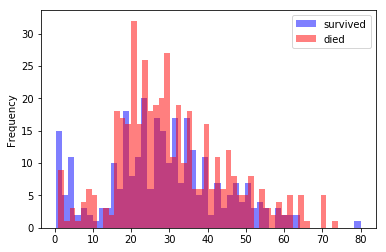

In [6]:
survived=train.loc[train['Survived']==1,:]
died=train.loc[train['Survived']==0,:]
survived['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
died['Age'].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['survived','died'])
plt.show()

* The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the blue bars are higher than the blue bars.

* In order for this to be useful to our machine learning model, we can **separate this continuous feature into a categorical feature by dividing it into ranges.** We can use the **`pandas.cut()`** function to help us out.

* The pandas.cut() function has two required parameters - the `column we wish to cut, and a list of numbers which define the boundaries of our cuts.` We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

* Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we also need to apply to the test data, otherwise we will be unable to use our model to make predictions for our submissions.

In [7]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

## TODO:
* Create the cut_points and label_names lists to split the Age column into six categories:
  * Missing, from -1 to 0
  * Infant, from 0 to 5
  * Child, from 5 to 12
  * Teenager, from 12 to 18
  * Young Adult, from 18 to 35
  * Adult, from 35 to 60
  * Senior, from 60 to 100
* Apply the process_age() function on the train dataframe, assigning the result to train.
* Apply the process_age() function on the test dataframe, assigning the result to test.
* Use DataFrame.pivot_table() to pivot the train dataframe by the Age_categories column.
* Use DataFrame.plot.bar() to plot the pivot table.

In [8]:
cut_points=[-1,0,5,12,18,35,60,100]
label_names=['Missing','Infant','Child','Teenager','Young Adult','Adult','Senior']

In [9]:
train=process_age(train,cut_points,label_names)

In [10]:
test=process_age(test,cut_points,label_names)

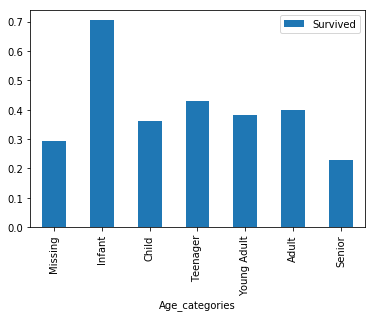

In [11]:
train_pivot=train.pivot_table(index='Age_categories',values='Survived')
train_pivot.plot.bar()
plt.show()

# 4. Preparing our Data for Machine Learning

* So far we have identified three columns that may be useful for predicting survival:
  * Sex
  * Pclass
  * Age, or more specifically our newly created Age_categories

* Before we build our model, we need to prepare these columns for machine learning. Most machine learning `algorithms can't understand text labels, so we have to convert our values into numbers.`

* Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the Pclass column, we know they are 1, 2, and 3. You can confirm this by running the following code:

* While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

* In order to remove this relationship, we can create dummy columns for each unique value in Pclass

* we can use the `pandas.get_dummies()` function, which will generate columns

In [12]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

## TODO:
* Use the create_dummies() function to create dummy variables for the Sex column:
  * in the train dataframe.
  * in the test dataframe.
* Use the create_dummies() function to create dummy variables for the Age_categories column:
  * in the train dataframe.
  * in the test dataframe.

In [13]:
train=create_dummies(train,'Sex')
test=create_dummies(test,'Sex')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,1


In [15]:
train=create_dummies(train,'Age_categories')
test=create_dummies(test,'Age_categories')

In [16]:
train=create_dummies(train,'Pclass')
test=create_dummies(test,'Pclass')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,1


# 5. Creating Our First Machine Learning Model

Now that our data has been prepared, we are ready to train our first model. The first model we will use is called **Logistic Regression**, which is often the first model you will train when performing **classification**.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. **The scikit-learn workflow consists of four main steps:**

* Instantiate (or create) the specific machine learning model you want to use
* Fit the model to the training data
* Use the model to make predictions
* Evaluate the accuracy of the predictions

## TODO:
* Instantiate a LogisticRegression object called lr.
* Use LogisticRegression.fit() to fit the model on the train dataset using:
  * The columns contained in columns as the first (X) parameter.
  * The Survived column as the second (y) parameter.

In [18]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression(solver='lbfgs')

In [21]:
lr.fit(train[columns],train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 6. Splitting Our Training Data

* Instead we can split our train dataframe into two:

   * One part to train our model on (often 80% of the observations)
   * One part to make predictions with and test our model (often 20% of the observations)

* we're going to call this Kaggle 'test' data **`holdout data`**, which is the technical name given to this type of data used for final predictions.

* The scikit-learn library has a handy **model_selection.train_test_split()** function that we can use to split our data. train_test_split() accepts two parameters, X and y, which contain all the data we want to train and test on, and returns four objects: train_X, train_y, test_X, test_y:

## TODO:
* Use the model_selection.train_test_split() function to split the train dataframe using the following parameters:
  * test_size of 0.2.
  * random_state of 0.
* Assign the four returned objects to train_X, test_X, train_y, and test_y.

In [22]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(train[columns],train['Survived'],test_size=0.2,random_state=0)

# 7. Making Predictions and Measuring their Accuracy

* Once we have fit our model, we can use the `LogisticRegression.predict()` method to make predictions.

The predict() method takes a single parameter X, a two dimensional array of features for the observations we wish to predict. X must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

* Again, scikit-learn has a handy function we can use to calculate accuracy: `metrics.accuracy_score()`. The function accepts two parameters, y_true and y_pred, which are the actual values and our predicted values respectively, and returns our accuracy score.

In [23]:
from sklearn.metrics import accuracy_score
lr=LogisticRegression(solver='lbfgs')
lr.fit(train_x,train_y)
predictions=lr.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

print(accuracy)

0.8100558659217877


# 8. Using Cross Validation for More Accurate Error Measurement

* Our model has an accuracy score of 81.0% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

* To give us a better understanding of the real performance of our model, we can use a technique called **cross validation** to train and test our model on different splits of our data, and then average the accuracy scores.

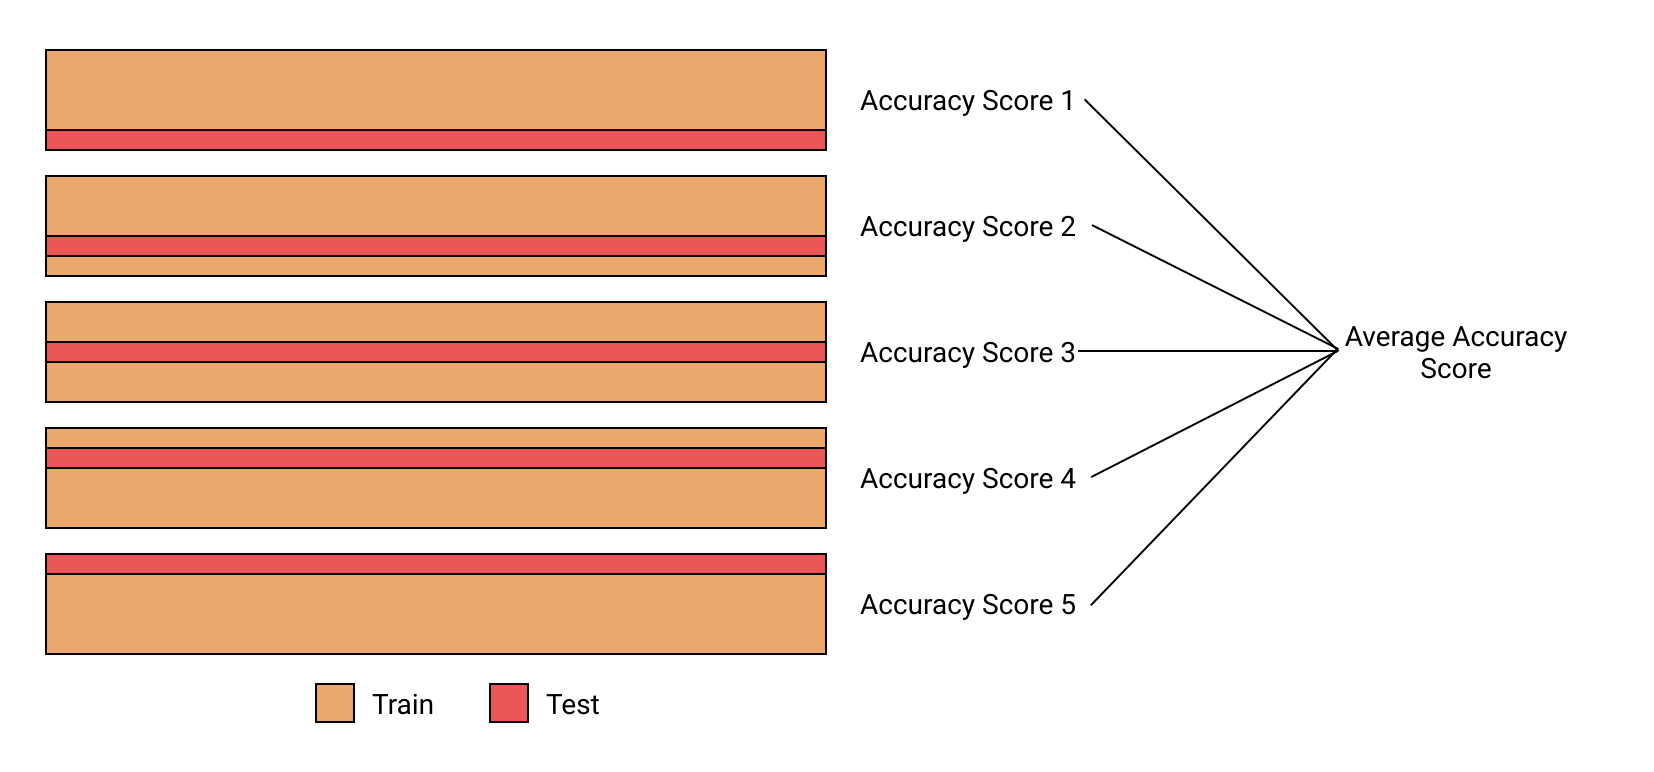

In [24]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/185/kaggle_cross_validation.svg')

The most common form of cross validation, and the one we will be using, is called **`k-fold cross validation`**. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds. 

* We will use scikit-learn's model_selection.cross_val_score() function to automate the process. The basic syntax for cross_val_score() is:

`cross_val_score(estimator, X, y, cv=None)`

* X is all features from our data set.
* y is the target variables.
* cv specifies the number of folds.

## TODO:
* Instantiate a new LogisticRegression() object, lr.
* Use model_selection.cross_val_score() to perform cross-validation on our data and assign the results to scores:
* Use the newly created lr as the estimator.
* Use all_X and all_y as the input data.
* Specify 10 folds to be used.
* Use the numpy.mean() function to calculate the mean of scores and assign the result to accuracy.
* Print the variables scores and accuracy.

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr=LogisticRegression(solver='lbfgs')
scores=cross_val_score(lr,train[columns],train['Survived'],cv=10)
accuracy=np.mean(scores)
print(accuracy)
scores

0.8024670865963002


array([0.8       , 0.81111111, 0.7752809 , 0.87640449, 0.80898876,
       0.78651685, 0.76404494, 0.76404494, 0.83146067, 0.80681818])

# 9. Making Predictions on Unseen Data

* From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important.

* We are now ready to use the model we have built to train our final model and then make predictions on our unseen holdout data, or what Kaggle calls the 'test' data set.

In [26]:
hold_out=test

## TODO:
* Instantiate a new LogisticRegression() object, lr.
* Use the fit() method to train the model lr using all of the Kaggle training data: all_X and all_y.
* Make predictions using the holdout data and assign the result to holdout_predictions.

In [27]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(train[columns],train['Survived'])
holdout_prediction=lr.predict(hold_out[columns])
holdout_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 10. Creating a Submission File

* The last thing we need to do is create a submission file. 
* Each Kaggle competition can have slightly different requirements for the submission file.
* Here's what is specified on the Titanic competition evaluation page:

  * You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

  * The file should have exactly 2 columns:

    * PassengerId (sorted in any order)
    * Survived (contains your binary predictions: 1 for survived, 0 for deceased)

* We will need to create a new dataframe that contains the holdout_predictions we created and the PassengerId column from the holdout dataframe. 

In [28]:
#To do this, we can pass a dictionary to the pandas.DataFrame() function:

holdout_ids = hold_out["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_prediction}
submission = pd.DataFrame(submission_df)


* Finally, we'll use the DataFrame.to_csv() method to save the dataframe to a CSV file. We need to make sure the index parameter is set to False, otherwise we will add an extra column to our CSV.

## TODO:
* Create a dataframe submission that matches Kaggle's specification.
* Use the to_csv() method to save the submission dataframe using the filename submission.csv, using the documentation to look up the correct syntax.

In [29]:
submission.to_csv('submission.csv',index=False)

# 11. Making Our First Submission to Kaggle

* Now that we have our submission file, we can start our submission to Kaggle by clicking the blue 'Submit Predictions' button on the [competition page](https://www.kaggle.com/c/titanic).


* You will then be prompted to upload your CSV file, and add a brief description of your submission. When you make your submission, Kaggle will process your predictions and give you your accuracy for the holdout data and your ranking

# 12. Next Steps

Here are some that we will cover in the next two missions of this course:

**Improving the features**:
 * `Feature Engineering:` Create new features from the existing data.
 * `Feature Selection:` Select the most relevant features to reduce noise and overfitting.
 
 
**Improving the model:**
 * `Model Selection:` Try a variety of models to improve performance.
 * `Hyperparameter Optimization:` Optimize the settings within each particular machine learning model.